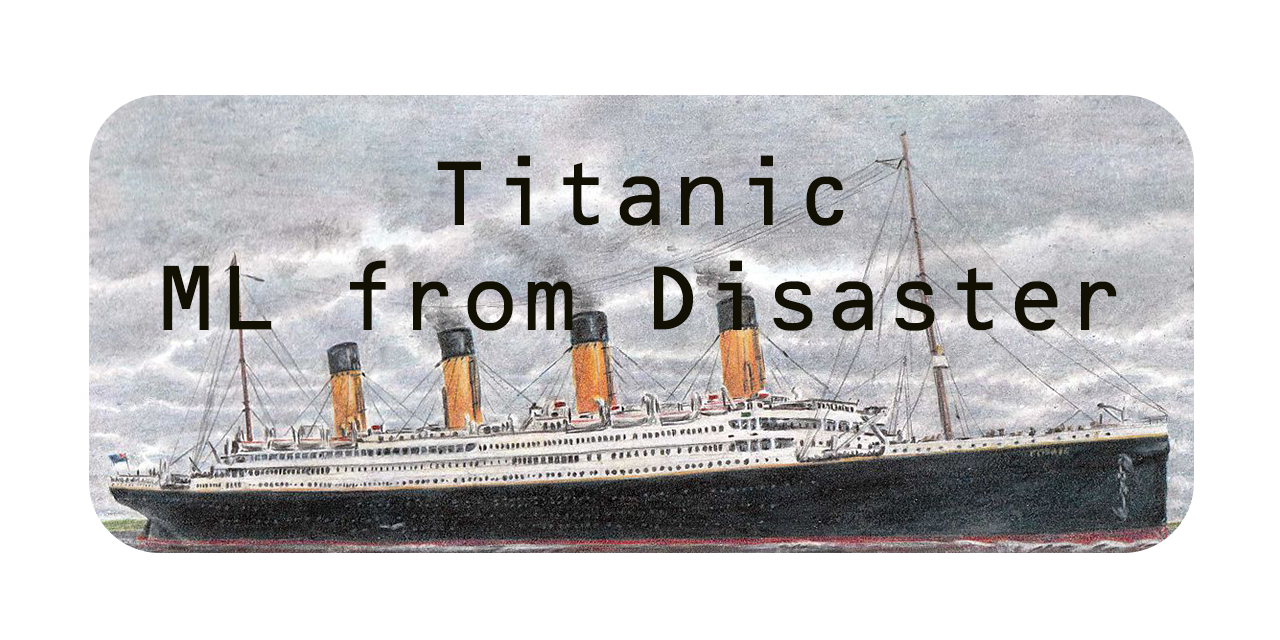

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,KFold,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report

import warnings
warnings.filterwarnings('ignore')

# **Loading Data**

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# **Exploratory data analysis**

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
for col in train.columns:
    print(train[col].value_counts(),"\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64 

Survived
0    549
1    342
Name: count, dtype: int64 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Sex
male      577
female    314
Name: count, dtype: int64 

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50  

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
def bar(col):
    ax = sns.countplot(data=train, hue=col, x="Survived")
    total = len(train)
    
    for p in ax.patches:
        height = p.get_height()
        percent = (height / total) * 100 
        percentage = f'{percent:.1f}%'
        if percent >= 1.5:
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(2, 10), textcoords='offset points')

    plt.xticks([1, 0], ['Survived', 'Dead'], rotation=90)
    plt.show()

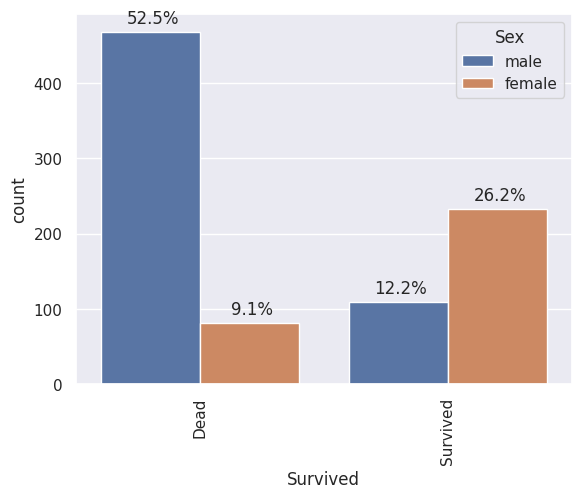

In [12]:
bar('Sex')

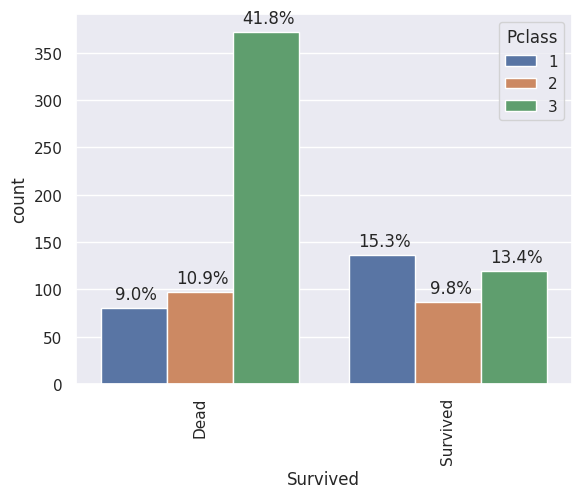

In [13]:
bar("Pclass")

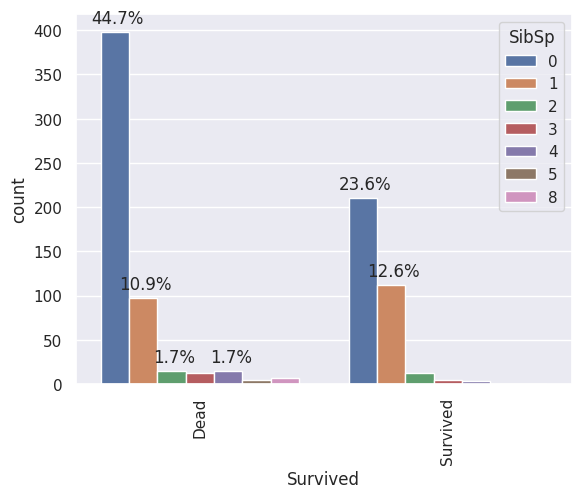

In [14]:
bar("SibSp")

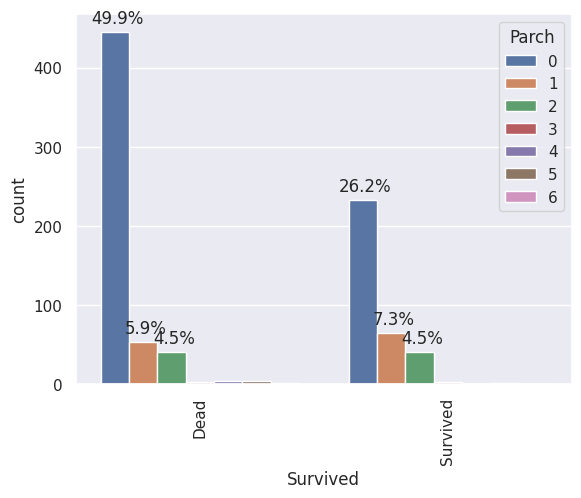

In [15]:
bar("Parch")

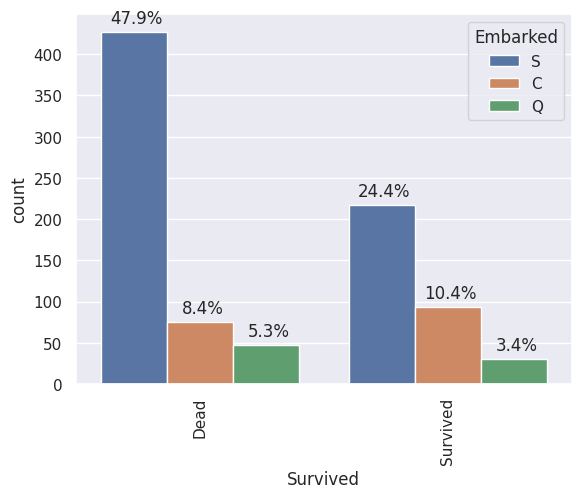

In [16]:
bar("Embarked")

# **preprocessing Data**

> **Name**

In [17]:
titanic = [train,test] 

for dataset in titanic:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
train.Title.value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [20]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Major":3,
               "Col":3,"Countess":3,"Capt":3,"Ms":3,"Sir":3,"Lady":3,"Mme":3,"Don":3,"Jonkheer":3}
for data in titanic:
    data["Title"]=data["Title"].map(title_mapping)

In [21]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


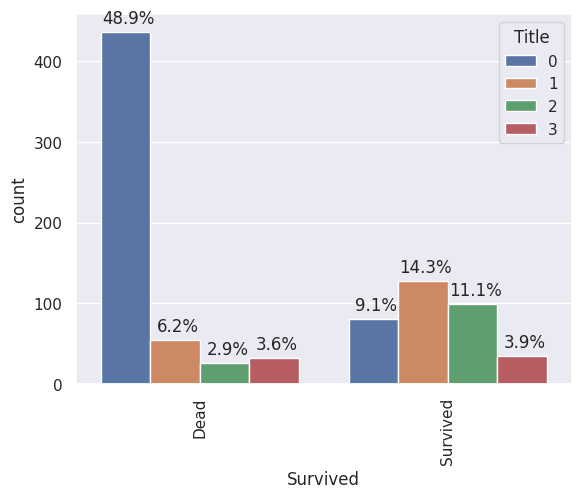

In [24]:
bar("Title")

> **Sex**

In [25]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

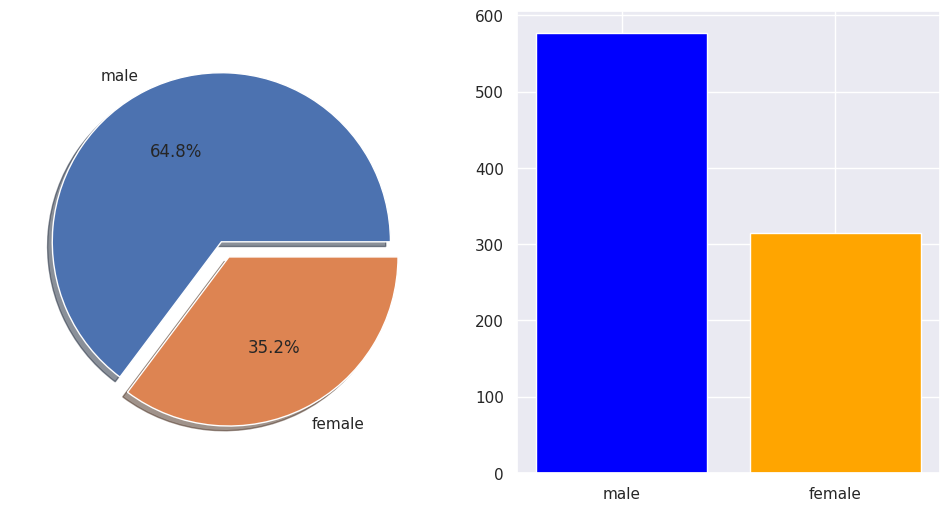

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train.Sex.value_counts().values, 
        labels=train.Sex.value_counts().index, 
        shadow=True, 
        autopct='%1.1f%%', 
        explode=[0, 0.1])

plt.subplot(1, 2, 2)
plt.bar(train.Sex.value_counts().index, train.Sex.value_counts().values, color=['blue', 'orange'])

plt.show()

In [27]:
le=LabelEncoder()
for data in titanic:
    data["Sex"]=le.fit_transform(data["Sex"])

In [28]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [29]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0.0


> **Pclass**

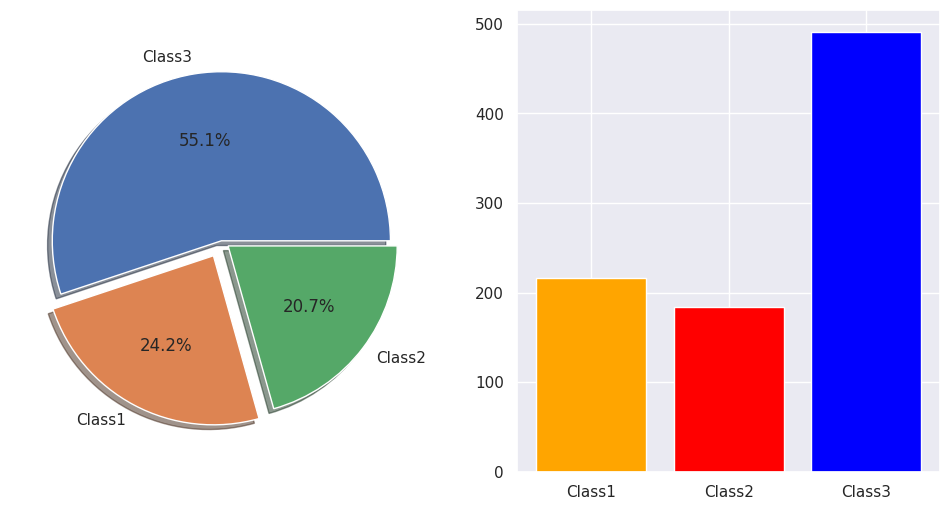

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train.Pclass.value_counts().values, 
        labels=["Class3","Class1","Class2"], 
        shadow=True, 
        autopct='%1.1f%%', 
        explode=[0, 0.1,0.05])

plt.subplot(1, 2, 2)
plt.bar(train.Pclass.value_counts().index, train.Pclass.value_counts().values, color=['blue', 'orange',"red"])
plt.xticks([1,2,3],["Class1","Class2","Class3"])
plt.show()

> **Age**

In [31]:
print(f"NUll value in Train : {train.Age.isnull().sum()}\n")
print(f"NUll value in Test : {test.Age.isnull().sum()}")

NUll value in Train : 177

NUll value in Test : 86


In [32]:
#imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
#for data in titanic:
#       data["Age"]=imputer.fit_transform(data["Age"])

In [33]:
for data in titanic:
       data.fillna(data.Age.mean(),axis=1,inplace=True)

In [34]:
print(f"NUll value in Train After replace : {train.Age.isnull().sum()}\n")
print(f"NUll value in Test After replace : {test.Age.isnull().sum()}")

NUll value in Train After replace : 0

NUll value in Test After replace : 0


In [35]:
train.Age.unique()

array([22.0, 38.0, 26.0, 35.0, 29.69911764705882, 54.0, 2.0, 27.0, 14.0,
       4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0,
       40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5,
       5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0,
       24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0,
       36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5,
       20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0,
       13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5,
       0.42, 34.5, 74.0], dtype=object)

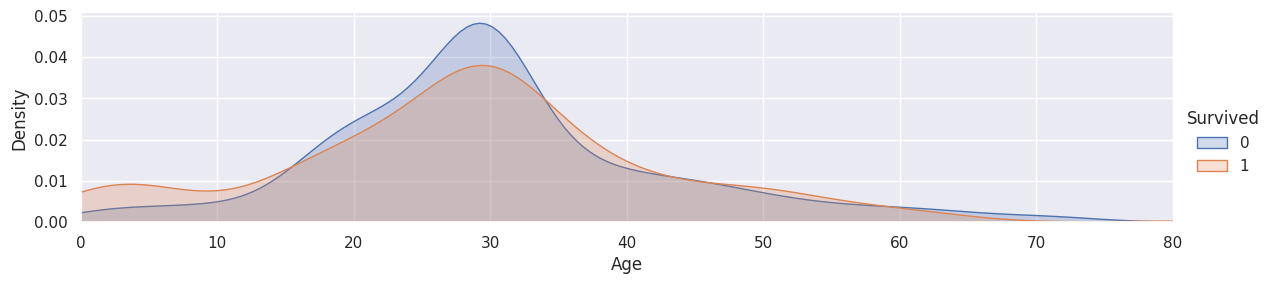

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)

facet.map(sns.kdeplot,'Age',shade= True)

facet.set(xlim=(0, train['Age'].max()))

facet.add_legend()
 
plt.show() 

In [37]:
for data in titanic:
      data.loc[data["Age"]<=16,"Age"]=0
      data.loc[(data["Age"]>16) & (data["Age"]<=26),"Age"]=1
      data.loc[(data["Age"]>26) & (data["Age"]<=36),"Age"]=2
      data.loc[(data["Age"]>36) & (data["Age"]<=46),"Age"]=3
      data.loc[(data["Age"]>46) & (data["Age"]<=56),"Age"]=4
      data.loc[(data["Age"]>56) & (data["Age"]<=66),"Age"]=5
      data.loc[data["Age"]>66,"Age"]=6

In [38]:
train.Age.value_counts()

Age
2    377
1    219
0    100
3     97
4     63
5     28
6      7
Name: count, dtype: int64

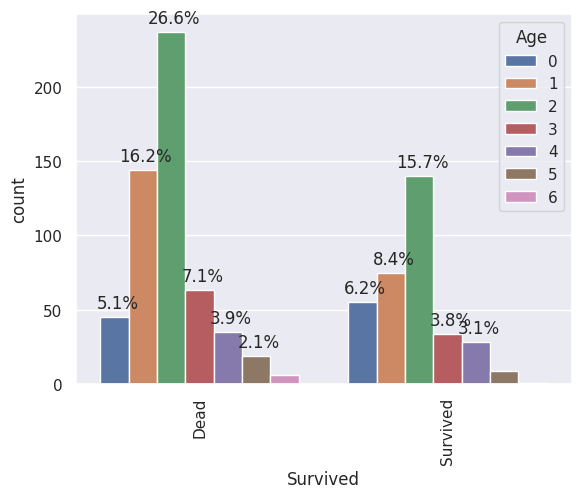

In [39]:
bar("Age")

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1,1,0,A/5 21171,7.25,29.699118,S,0
1,2,1,1,0,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.925,29.699118,S,1
3,4,1,1,0,2,1,0,113803,53.1,C123,S,2
4,5,0,3,1,2,0,0,373450,8.05,29.699118,S,0


> **SibSp and Parch**

In [41]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [42]:
train.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [43]:
for data in titanic:
    data["family size"]=data["Parch"]+data["SibSp"]+1
    data.drop(["SibSp","Parch"],axis=1,inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family size
0,1,0,3,1,1,A/5 21171,7.25,29.699118,S,0,2
1,2,1,1,0,3,PC 17599,71.2833,C85,C,2,2
2,3,1,3,0,1,STON/O2. 3101282,7.925,29.699118,S,1,1
3,4,1,1,0,2,113803,53.1,C123,S,2,2
4,5,0,3,1,2,373450,8.05,29.699118,S,0,1


In [45]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
family size    0
dtype: int64

> **Ticket**

In [46]:
train.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [47]:
for data in titanic:
    data.drop(["Ticket"],axis=1,inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
0,1,0,3,1,1,7.25,29.699118,S,0,2
1,2,1,1,0,3,71.2833,C85,C,2,2
2,3,1,3,0,1,7.925,29.699118,S,1,1
3,4,1,1,0,2,53.1,C123,S,2,2
4,5,0,3,1,2,8.05,29.699118,S,0,1


> **Fare**

In [49]:
train.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [50]:
print(f"NUll value in Train : {train.Fare.isnull().sum()}\n")
print(f"NUll value in Test : {test.Fare.isnull().sum()}")

NUll value in Train : 0

NUll value in Test : 0


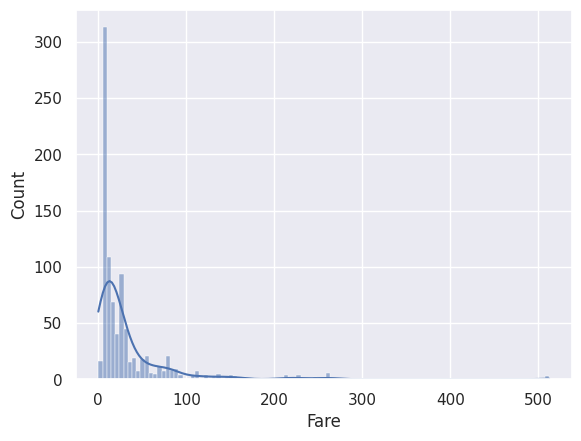

In [51]:
sns.histplot(train["Fare"], kde=True)
plt.show()

> **Cabin**

In [52]:
train.Cabin.value_counts()

Cabin
29.699118      687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [53]:
for data in titanic:      
    data['Cabin'] = data['Cabin'].str[:1]

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
0,1,0,3,1,1,7.25,NaN,S,0,2
1,2,1,1,0,3,71.2833,C,C,2,2
2,3,1,3,0,1,7.925,NaN,S,1,1
3,4,1,1,0,2,53.1,C,S,2,2
4,5,0,3,1,2,8.05,NaN,S,0,1


In [55]:
print(f"NUll value in Train : {train.Cabin.isnull().sum()}\n")
print(f"NUll value in Test : {test.Cabin.isnull().sum()}")

NUll value in Train : 687

NUll value in Test : 327


In [56]:
train.Cabin.value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [57]:
for data in titanic:
    data["Cabin"]=le.fit_transform( data["Cabin"])

In [58]:
print(f"NUll value in Train After  : {train.Cabin.isnull().sum()}\n")
print(f"NUll value in Test After : {test.Cabin.isnull().sum()}")

NUll value in Train After  : 0

NUll value in Test After : 0


In [59]:
train.Cabin.value_counts()

Cabin
8    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
7      1
Name: count, dtype: int64

> **Embarked**

In [60]:
train.Embarked.value_counts()

Embarked
S            644
C            168
Q             77
29.699118      2
Name: count, dtype: int64

In [61]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in titanic:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [62]:
train.Embarked.value_counts()

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64

In [63]:
for data in titanic:
       data.fillna(data.Embarked.mean(),axis=1,inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
0,1.0,0.0,3.0,1.0,1.0,7.2500,8.0,0.0,0.0,2.0
1,2.0,1.0,1.0,0.0,3.0,71.2833,2.0,1.0,2.0,2.0
2,3.0,1.0,3.0,0.0,1.0,7.9250,8.0,0.0,1.0,1.0
3,4.0,1.0,1.0,0.0,2.0,53.1000,2.0,0.0,2.0,2.0
4,5.0,0.0,3.0,1.0,2.0,8.0500,8.0,0.0,0.0,1.0


# **ML Models**

In [65]:
x=train.drop("Survived",axis=1)
y=train["Survived"]

In [66]:
x.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
0,1.0,3.0,1.0,1.0,7.2500,8.0,0.0,0.0,2.0
1,2.0,1.0,0.0,3.0,71.2833,2.0,1.0,2.0,2.0
2,3.0,3.0,0.0,1.0,7.9250,8.0,0.0,1.0,1.0
3,4.0,1.0,0.0,2.0,53.1000,2.0,0.0,2.0,2.0
4,5.0,3.0,1.0,2.0,8.0500,8.0,0.0,0.0,1.0


In [67]:
x.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
family size    0
dtype: int64

In [68]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

> **Kfold split**

In [69]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)

> **Logistic Regression**

In [70]:
classifier=LogisticRegression()
sc="accuracy"
score=cross_val_score(classifier,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.79329609 0.79213483 0.84831461 0.79213483 0.8258427 ]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [71]:
round(np.mean(score)*100, 2)

81.03

> **KNN**

In [72]:
classifier2=KNeighborsClassifier(n_neighbors=10)
sc="accuracy"
score=cross_val_score(classifier2,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.66480447 0.67977528 0.65168539 0.61797753 0.64044944]


In [73]:
round(np.mean(score)*100, 2)

65.09

> **SVC**

In [74]:
classifier3=SVC(kernel='rbf', random_state= 42)
sc="accuracy"
score=cross_val_score(classifier3,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.59776536 0.66853933 0.64606742 0.65730337 0.66292135]


In [75]:
round(np.mean(score)*100, 2)

64.65

> **Decision Tree**

In [76]:
classifier4 = DecisionTreeClassifier(criterion = "entropy" ,max_depth=10 ,random_state= 0)
sc="accuracy"
score=cross_val_score(classifier4,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.78212291 0.74719101 0.79213483 0.78651685 0.81460674]


In [77]:
round(np.mean(score)*100, 2)

78.45

> **XGBClassifier**

In [78]:
classifier5 = XGBClassifier(max_depth = 4 , learning_rate = 0.3 ,n_estimators= 50, random_state=42 , max_features= 6 )
sc="accuracy"
score=cross_val_score(classifier5,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.83798883 0.80337079 0.85955056 0.78651685 0.86516854]


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.



In [79]:
round(np.mean(score)*100, 2)

83.05

> **Naive Bayes**

In [80]:
classifier6=GaussianNB()
sc="accuracy"
score=cross_val_score(classifier6,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.79329609 0.82022472 0.81460674 0.75280899 0.78089888]


In [81]:
round(np.mean(score)*100, 2)

79.24

> **Voting**

In [82]:
classifier7=VotingClassifier(estimators=[("SVC" , classifier3) , ('KNeighborsClassifier' , classifier2) ,
                                     ("DecisionTreeClassifier" , classifier4) ,("XGBClassifier" , classifier5)] , voting = "hard")

sc="accuracy"
score=cross_val_score(classifier5,x,y,cv=kfold, n_jobs=-1, scoring=sc)
print(score)

[0.83798883 0.80337079 0.85955056 0.78651685 0.86516854]


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.



In [83]:
round(np.mean(score)*100, 2)

83.05

# **Train_test_split**

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [85]:
x_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
445,446.0,1.0,1.0,0.0,81.8583,0.0,0.0,3.0,3.0
650,651.0,3.0,1.0,2.0,7.8958,8.0,0.0,0.0,1.0
172,173.0,3.0,0.0,0.0,11.1333,8.0,0.0,1.0,3.0
450,451.0,2.0,1.0,2.0,27.7500,8.0,0.0,0.0,4.0
314,315.0,2.0,1.0,3.0,26.2500,8.0,0.0,0.0,3.0


> **Logistic Regression**

In [86]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred=model_1.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [88]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       157
         1.0       0.77      0.74      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

____________________________________________________________________

accuracy_score: 80.22388059701493
[[133  24]
 [ 29  82]]
True Positive: 82
True Negative: 133
False Positive: 24
False Negative: 29
precision_score1: 0.7735849056603774
precision_score2: 0.7735849056603774
recall_score: 0.7387387387387387
recall_score: 0.7387387387387387


> **SVC**

In [89]:
model_2=SVC(kernel="rbf",random_state=42)
model_2.fit(x_train,y_train)

SVC(random_state=42)

In [90]:
y_pred=model_2.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [91]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.60      0.97      0.74       157
         1.0       0.67      0.09      0.16       111

    accuracy                           0.60       268
   macro avg       0.63      0.53      0.45       268
weighted avg       0.63      0.60      0.50       268

____________________________________________________________________

accuracy_score: 60.447761194029844
[[152   5]
 [101  10]]
True Positive: 10
True Negative: 152
False Positive: 5
False Negative: 101
precision_score1: 0.6666666666666666
precision_score2: 0.6666666666666666
recall_score: 0.09009009009009009
recall_score: 0.09009009009009009


> **KNN**

In [92]:
model_3=KNeighborsClassifier(n_neighbors=15)
model_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [93]:
y_pred=model_3.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [94]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.64      0.89      0.75       157
         1.0       0.66      0.30      0.41       111

    accuracy                           0.65       268
   macro avg       0.65      0.59      0.58       268
weighted avg       0.65      0.65      0.61       268

____________________________________________________________________

accuracy_score: 64.55223880597015
[[140  17]
 [ 78  33]]
True Positive: 33
True Negative: 140
False Positive: 17
False Negative: 78
precision_score1: 0.66
precision_score2: 0.66
recall_score: 0.2972972972972973
recall_score: 0.2972972972972973


> **DecisionTreeClassifier**

In [95]:
model_4 = DecisionTreeClassifier(criterion = "entropy" ,max_depth=4 ,random_state= 42  , max_features=6)
model_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=6,
                       random_state=42)

In [96]:
y_pred=model_4.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [97]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       157
         1.0       0.78      0.80      0.79       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.82      0.82       268

____________________________________________________________________

accuracy_score: 82.46268656716418
[[132  25]
 [ 22  89]]
True Positive: 89
True Negative: 132
False Positive: 25
False Negative: 22
precision_score1: 0.7807017543859649
precision_score2: 0.7807017543859649
recall_score: 0.8018018018018018
recall_score: 0.8018018018018018


> **RandomForestClassifier**

In [98]:
model_5=RandomForestClassifier(n_estimators=120,criterion = "entropy" ,max_depth=4 ,random_state= 42  , max_features=6)
model_5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=6,
                       n_estimators=120, random_state=42)

In [99]:
y_pred=model_5.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [100]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       157
         1.0       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

____________________________________________________________________

accuracy_score: 81.71641791044776
[[138  19]
 [ 30  81]]
True Positive: 81
True Negative: 138
False Positive: 19
False Negative: 30
precision_score1: 0.81
precision_score2: 0.81
recall_score: 0.7297297297297297
recall_score: 0.7297297297297297


> **Naive bayes**

In [101]:
model_6=GaussianNB()
model_6.fit(x_train,y_train)

GaussianNB()

In [102]:
y_pred=model_6.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1.

In [103]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.85      0.80      0.83       157
         1.0       0.74      0.80      0.77       111

    accuracy                           0.80       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.80      0.80       268

____________________________________________________________________

accuracy_score: 80.22388059701493
[[126  31]
 [ 22  89]]
True Positive: 89
True Negative: 126
False Positive: 31
False Negative: 22
precision_score1: 0.7416666666666667
precision_score2: 0.7416666666666667
recall_score: 0.8018018018018018
recall_score: 0.8018018018018018


> **GradientBoostingClassifier**

In [104]:
model_7=GradientBoostingClassifier(learning_rate=.1,n_estimators=50,max_depth=7,max_features=5,random_state=42)
model_7.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7, max_features=5, n_estimators=50,
                           random_state=42)

In [105]:
y_pred=model_7.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [106]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       157
         1.0       0.84      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

____________________________________________________________________

accuracy_score: 83.2089552238806
[[141  16]
 [ 29  82]]
True Positive: 82
True Negative: 141
False Positive: 16
False Negative: 29
precision_score1: 0.8367346938775511
precision_score2: 0.8367346938775511
recall_score: 0.7387387387387387
recall_score: 0.7387387387387387


> **AdaBoostClassifier**

In [107]:
model_8=AdaBoostClassifier(learning_rate=.1,n_estimators=50,random_state=42)
model_8.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=42)

In [108]:
y_pred=model_8.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [109]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       157
         1.0       0.80      0.75      0.77       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

____________________________________________________________________

accuracy_score: 81.71641791044776
[[136  21]
 [ 28  83]]
True Positive: 83
True Negative: 136
False Positive: 21
False Negative: 28
precision_score1: 0.7980769230769231
precision_score2: 0.7980769230769231
recall_score: 0.7477477477477478
recall_score: 0.7477477477477478


> **XGB**

In [110]:
model_9=XGBClassifier(learning_rate=.1,n_estimators=50,random_state=42,)
model_9.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [111]:
y_pred=model_9.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [112]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       157
         1.0       0.85      0.70      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268

____________________________________________________________________

accuracy_score: 82.46268656716418
[[143  14]
 [ 33  78]]
True Positive: 78
True Negative: 143
False Positive: 14
False Negative: 33
precision_score1: 0.8478260869565217
precision_score2: 0.8478260869565217
recall_score: 0.7027027027027027
recall_score: 0.7027027027027027


> **Voting**

In [113]:
model_10=VotingClassifier(estimators=[("LogisticRegression" , model_1) ,('KNeighborsClassifier' , model_3) ,("DescionTree",model_4), 
                                     ("GradientBoostingClassifier",model_7),("GaussianNB",model_6),("AdaBoostClassifier",model_8),
                                      ("XGBClassifier" , model_9) ,("RandomForestClassifier" , model_5)] , voting = "soft")
model_10.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=15)),
                             ('DescionTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_features=6,
                                                     random_state=42)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(max_depth=7,
                                                         max_features=5,
                                                         n_estimators=50,
                                                         random_state...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_features=6,
                                                     n_estimators=120,
                                                     random_state=42))],
                 voting='soft')

In [114]:
y_pred=model_10.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [115]:
print(f"classification_report:\n { classification_report(y_test,y_pred)}")
print("____________________________________________________________________\n")
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       157
         1.0       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

____________________________________________________________________

accuracy_score: 80.59701492537313
[[136  21]
 [ 31  80]]
True Positive: 80
True Negative: 136
False Positive: 21
False Negative: 31
precision_score1: 0.7920792079207921
precision_score2: 0.7920792079207921
recall_score: 0.7207207207207207
recall_score: 0.7207207207207207


# **Testing**

In [117]:
test_data = test.copy()
prediction = model_7.predict(test_data)

In [118]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family size
0,892.0,3.0,1.0,2.0,7.8292,7.0,2.0,0.0,1.0
1,893.0,3.0,0.0,4.0,7.0000,7.0,0.0,2.0,2.0
2,894.0,2.0,1.0,5.0,9.6875,7.0,2.0,0.0,1.0
3,895.0,3.0,1.0,2.0,8.6625,7.0,0.0,0.0,1.0
4,896.0,3.0,0.0,1.0,12.2875,7.0,0.0,2.0,3.0


In [119]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv',index=False)

In [122]:
submission.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0


# Thanks